# CHEM 1000 - Fall 2020
Prof. Geoffrey Hutchison, University of Pittsburgh

## 5 Scalar and Vector Operators

Chapter 5 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Understand the concept of operators
- Apply some operators to functions
- Understand how to apply multiple operators in order (right to left, inside out)
- Understand that some operators do not commute, and we use the [A, B] "commutator" to test that

### Scalars vs. Vectors

Reminder...

**Scalars** are just numbers - they have a magnitude, a size. The mass of a molecule would be an example, e.g., 120 amu.

**Vectors** have both a magnitude and a direction:
- velocity $\mathbf{v}$
- acceleration $\mathbf{a}$
- force $\mathbf{F}$
- electric field $\mathbf{E}$

### Functions

A **function** takes in a number, a vector, etc. and returns a number:

$$
\sin 0 = 0
$$

### Operators

<div class="alert alert-block alert-success">

An operator takes in a **function** and returns a *new function*.
    
</div>

We've already worked with lots of operators, we just didn't call them that at the time.

Examples of mathematical operations include multiplying a function by a constant or taking the derivative of a function.

**Consider the operator $\hat{A}$**

$$
\hat{A} f(x)=2 f(x)
$$

We'd say this as "the operator $\hat{A}$ acts on the function $f (x)$. In this case, we can see that $\hat{A}$ is simply the ***doubling*** operator. Whatever $f(x)$ is, $\hat{A}$ doubles it by multiplying by 2.

**Another example might be $\hat{B}$**

$$
\hat{B} f(x, y)=(f(x, y))^{2}
$$

Here, $\hat{B}$ acting on $f(x)$ is the ***square*** operator - whatever $f(x)$ might be, the resulting function is the square of that function.

**We also have the differential operator $\hat{d_x}$**

$$
\hat{d_x} f(x,y) = \frac{\partial}{\partial x}[f(x,y)]
$$

<div class="alert alert-block alert-success">

**What's the point?** As the algebra and calculus get a bit more involved, operators give us a way to write more complex math in a shorter way.
    
</div>

Operators may seem abstract. It's often better to consider them acting on some function. But most mathematical operations can be written as operators:
- adding
- subtracting
- multiplying (by a scalar or vector)
- dividing
- raising a function to a power
- taking a derivative
- integrating
- translating coordinates
- rotating
- (etc.)

We'll see in quantum chemistry that certain physical properties can be written as operators, for example:

**Linear momentum operator $\hat{p_x}$**

$$
\hat{p_x} f(x,y) = -i\hbar \frac{\partial}{\partial x}[f(x,y)]
$$

where $\hbar$ is the [*reduced Planck constant*](https://en.wikipedia.org/wiki/Planck_constant) $h / 2\pi$.

There are meaningful consequences to that $i$ in the linear momentum operator...

**Kinetic energy operator $\hat{T}$**

Since kinetic energy of a particle can be written as:

$$
E = \frac{p^2}{2m}
$$

The kinetic energy operator is:
$$
\hat{T} = \frac{\hat{p}^2}{2m} = \frac{1}{2m} \hat{p}^2
$$

where $m$ is the mass of the particle.

<div class="alert alert-block alert-info">

**Math with operators** We can (carefully) combine and modify operators. Not all operators commute, so we have to take them in order - inside to out (e.g., right to left).
    
Normally, we write out multiple operations as if they are ***multiplied***.
    
**Example**:
    
$$
    x\hat{d_x}f(x) = x \cdot \frac{\partial}{\partial x}f(x)
$$

$$
    \hat{d_x}x f(x) = \frac{\partial}{\partial x}[x \cdot f(x)]
$$
    
</div>

**Linear Operators**

Linear operators can be distributed over multiple terms of a function.

For example, multiplying by 2 or taking a derivative are both linear functions.

$$
2\times(f(x) + g(x) = 2f(x) + 2g(x)
$$

Taking the derivative:

$$
\hat{d_x}(f(x) + g(x)) = \hat{d_x}f(x) + \hat{d_x}g(x) = \frac{\partial}{\partial x}f(x) + \frac{\partial}{\partial x}g(x)
$$

That "square" operator up above, $\hat{B}$ is *not* a linear function.

$$
(x^2 + 3x)^2 \neq (x^2)^2 + (3x)^2
$$

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.6.2 (Python 3.6.11-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



In [2]:
(x**2)**2 + (3*x)**2

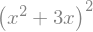

In [3]:
(x**2 + 3*x)**2

Hmph. Sympy sometimes needs a nudge to expand or simplify expressions.

In [4]:
expand((x**2 + 3*x)**2)

Obviously, taking the square of a function isn't a linear function - in our example, we have the $6x^3$ term there, which comes from multiplying $x^2$ and $3x$ together, twice.

Fortunately, in most cases operators we need for physics and chemistry are usually linear.

Let's consider "multiply by x" $\hat{x}$ and "take a derivative" $\hat{d_x}$ operators:

In [5]:
# let's set up an example function to test out some of these operators
f = x**2 + 3*x

In [6]:
x * diff(f, x)

In [7]:
diff(x*f, x)

Okay, so that's a good reminder.

<div class="alert alert-block alert-info">

Operators do not necessarily commute. If I multiply by x and take a derivative, I end up with a very different result than if I take a derivative and multiply the result by x.
    
</div>

**Commuting Operators**

Quick reminder: [commuting](https://en.wikipedia.org/wiki/Commutative_property) means that you can add or multiply in any order:

$$
2\times 3 = 3 \times 2 = 6
$$

$$
101 + 52 = 52 + 101 = 153
$$

As we saw above with "multiply by x" and "take the partial derivative with respect to y" operators, operator order matters.

Sometimes we check this, with a concept called the "commutator":

$$
[\hat{A}, \hat{B}] = \hat{A}\hat{B} - \hat{B}\hat{A}
$$

If the two operators commute, then this will obviously equal zero - you can take them in any order. In some cases, this won't be zero.

<div class="alert alert-block alert-info">

We're going through all this because in quantum mechanics, all the properties of a system (e.g., an atom, a molecule, etc.) can be described by "wavefunctions" $\psi(x)$.
    
Any physical observable, like "find the position of" or "what is the energy of" corresponds to specific operators like the linear momentum operator.
    
If two operators commute, we can make both measurements successfully.
    
*If two operators do not commute, weird things happen (e.g., we can't know the exact location and momentum of an electron at the same time).*
    
</div>

Let's see this in action with "multiply by x" $\hat{x}$ (which is actually the 'measure the position' operator) and linear momentum $\hat{p} = -i\hbar\frac{\partial}{\partial x}$:



In [8]:
# we set this above, but we can use any function
f = x**2 + 3*x
i, hbar = symbols("i hbar")

In [9]:
# let's consider x * p(f)
x * (-i * hbar)*diff(f, x)

In [10]:
# now let's see p(x*f)
(-i * hbar)*diff(x*f, x)

In [11]:
# and we'll take the difference
part_one = x * (-i * hbar)*diff(f, x)
part_two = (-i * hbar)*diff(x*f, x)
part_one - part_two

Obviously, that can be simplified further - we need to give Sympy a nudge:

(Even computer programs can be lazy.)

In [12]:
simplify(part_one - part_two)

We also mentioned the linear momentum and kinetic energy operators back there...

**Linear momentum:**

$$
$\hat{p} = -i\hbar\frac{\partial}{\partial x}$
$$

**Kinetic energy:**

$$
\hat{T} = \frac{\hat{p}^2}{2m} = \frac{1}{2m} \hat{p}^2
$$

In [17]:
# here, we'll apply linear momentum operator to "measure" our function
# (e.g., f(x) describes some electron)
(-i * hbar)*diff(f, x)

In [18]:
# Okay, if we want to "measure" the kinetic energy
# we want 1/2m * p**2
# p**2 = take the second derivative
# and then we have some constant terms
p_squared = (-i * hbar)**2 * diff(f, x, 2)
t = 0.5 * p_squared / m

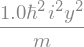

In [19]:
# print t with some nice formatting
t

As a human, we can see a little simplification (e.g. $i^2 = -1$) but otherwise it's fine:

$$
\hat{t} = \frac{-\hbar^2 y^2}{m}
$$

**One more thing...**

We had this concept of the Euler test to see if a total differential was an exact differential.

$$
\hat{d_x} = \frac{\partial}{\partial_x}
$$

$$
\hat{d_y} = \frac{\partial}{\partial_y}
$$

Since we can apply operators sequentially:

$$
\hat{d_y}\hat{d_x}f(x,y) = \frac{\partial}{\partial_y} [ \frac{\partial}{\partial_x}[f(x,y)] ]
$$

Then the Euler test would be:
$$
\hat{d_y}\hat{d_x}f(x,y) - \hat{d_x}\hat{d_y}f(x,y) = 0
$$

Or we can use the commutator notation:

$$
[\hat{d_x}, \hat{d_y}] = 0
$$

In [13]:
f = x**2*y**2 + 3*x*y + 4

In [14]:
diff(f, x, y)

In [15]:
diff(f, y, x)

In [16]:
diff(f, x, y) - diff(f, y, x)

<div class="alert alert-block alert-info">

So the big points for now:
- Operators are used in quantum mechanics to describe physical properties like energy and momentum
- Some operators commute. Those that don't mean that those physical properties can't be measured at the same time.
  - e.g. position and momentum in the [Heisenberg Uncertainty Principle](https://en.wikipedia.org/wiki/Uncertainty_principle)
- We like operators because they help us write complicated formulas in a shorter way
  - they're kind of like little mini programs (e.g. "take the derivative of this twice, then multiply by some constants")
- It's a bit abstract for now, but we'll have concrete, chemical examples soon
</div>

-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>